In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,LSTM,Activation,Dropout,Bidirectional
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
import math

In [5]:
data=pd.read_csv('C:/Users/ARSHTVIK/Downloads/datasets/ICICIBANK_data.csv')

In [6]:
data.head()

,Date,open,high,low,close,adj_close,volume
0,2002-07-01,25.418200,25.818199,24.818199,25.127300,6.023036,2047540.0
1,2002-07-02,25.454500,27.636400,25.236401,26.745399,6.410896,5546354.0
2,2002-07-03,26.727301,28.181801,26.645500,28.090900,6.733414,5745267.0
3,2002-07-04,28.181801,28.799999,27.036400,27.390900,6.565624,3896602.0
4,2002-07-05,27.090900,27.863600,26.945400,27.672701,6.633172,3261038.0


In [7]:
data.isnull().any()

Date         False
open          True
high          True
low           True
close         True
adj_close     True
volume        True
dtype: bool

In [8]:
data.dropna(inplace=True)

In [9]:
data.isnull().any()

Date         False
open         False
high         False
low          False
close        False
adj_close    False
volume       False
dtype: bool

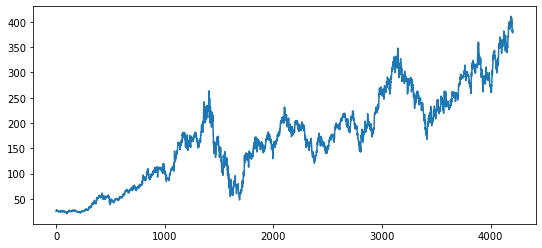

In [10]:
plt.figure(figsize=(9,4))
plt.plot(data['open'])
plt.show()

In [11]:
high=np.array(data['high'])
low=np.array(data['low'])
price=(high+low)/2

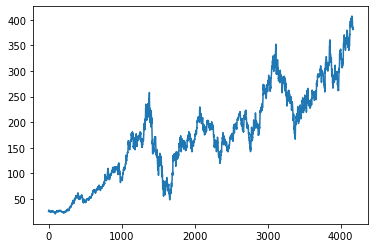

In [12]:
plt.plot(price)
plt.show()

In [13]:
train_perc=math.floor(data['high'].count()*0.9)
train_perc

3750

In [14]:
train_data=price[0:train_perc]
test_data=price[train_perc:]

In [15]:
sc=MinMaxScaler(feature_range=(0,1))
train_data=train_data.reshape(-1,1)
test_data=test_data.reshape(-1,1)
train_data=sc.fit_transform(train_data)
test_data=sc.fit_transform(test_data)

In [16]:
def create_dataset(data,shuffle=False):
    gen=TimeseriesGenerator(data,data,length=10,shuffle=False)
    X=[]
    Y=[]
    for i in range(len(gen)):
        a,b=gen[i]
        for j in range(a.shape[0]):
            X.append(a[j])
            Y.append(b[j])
    
    return np.array(X),np.array(Y)

In [17]:
X_train,Y_train=create_dataset(train_data)
X_test,Y_test=create_dataset(test_data)

In [36]:
model = Sequential([
Bidirectional(LSTM(128,return_sequences=True)),
Bidirectional(LSTM(256,return_sequences=True)),
Dropout(0.25),
Bidirectional(LSTM(256,return_sequences=False)),
Dropout(0.3),
Dense(1),
])

In [37]:
model.compile(optimizer='adam',loss='mse')

In [38]:
history=model.fit(X_train,Y_train,epochs=5)

Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
117/117 [==============================] - 17s 144ms/step - loss: 0.0058
Epoch 2/5
117/117 [==============================] - 17s 143ms/step - loss: 0.0011
Epoch 3/5
117/117 [==============================] - 17s 145ms/step - loss: 9.2935e-04
Epoch 4/5
117/117 [==============================] - 17s 147ms/step - loss: 9.3575e-04
Epoch 5/5
117/117 [=============================

In [39]:
model.evaluate(X_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
13/13 [==============================] - 1s 50ms/step - loss: 0.0000e+00


0.0

In [40]:
fut=model.predict(X_test)
pres=model.predict(X_train)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [41]:
future=sc.inverse_transform(fut)
past=sc.inverse_transform(pres)
true_y=sc.inverse_transform(Y_test.reshape(-1,1))
past_y=sc.inverse_transform(Y_train.reshape(-1,1))
print(future.shape)
print(true_y.shape)

(407, 1)
(407, 1)


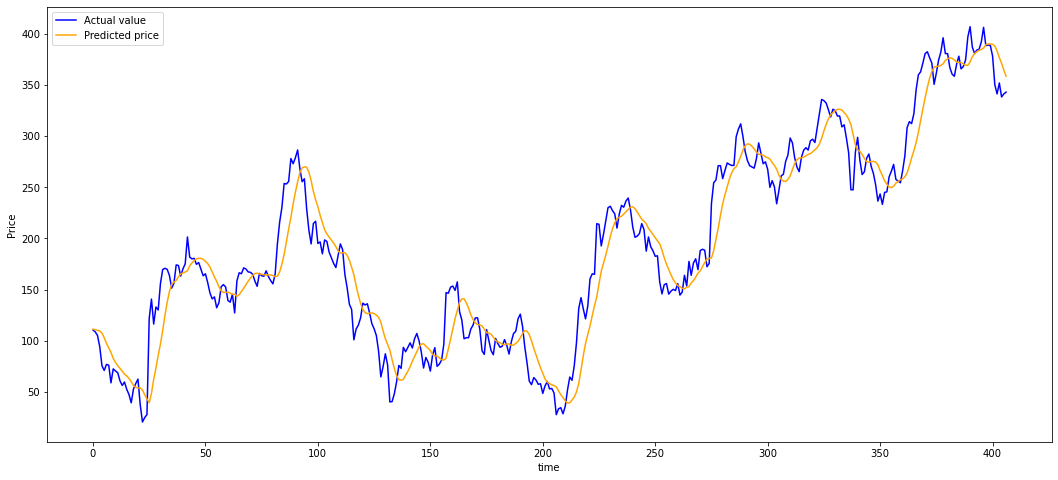

In [42]:
plt.figure(figsize=(18,8))
plt.plot(true_y,color='blue',label='Actual value')
plt.plot(future,color='orange',label='Predicted price')
plt.ylabel('Price')
plt.xlabel('time')
plt.legend()
plt.show()

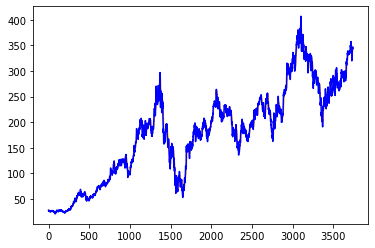

In [43]:
plt.plot(past,color='orange')
plt.plot(past_y,color='blue')
plt.show()

In [44]:
avg=np.reshape(price,(-1,1))
avg=sc.fit_transform(avg)
X,Y=create_dataset(avg)

In [45]:
predictions=model.predict(X)

In [46]:
g=np.append(avg,predictions)

In [47]:
v=np.array(np.array(avg[-5:]).reshape(1,5,1))

In [48]:
def future_predict(data,model):
    output=[]
    for i in range(5):
        data=data[-5:]
        pred=model.predict(np.array(np.array(data).reshape(1,5,1)))
        output.append(pred)
        data=np.concatenate([data,pred],axis=0)
        #print(data)
    return output

In [49]:
s=future_predict(avg[-50:],model)

In [50]:
z=np.concatenate([v,np.array(s).reshape(1,5,1)],axis=1)

In [51]:
z.shape

(1, 10, 1)

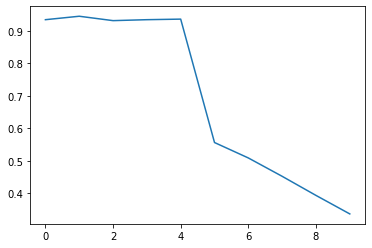

In [52]:
#plt.plot(avg[-30:])
plt.plot(z.reshape(10,1))
#plt.plot(np.array(s).reshape(10,1),color='orange')
plt.show()